# Домашнее задание 2. Классификация, детекция.

Оценка за часть 1 и часть 2 в этом дз -- по 5 баллов.

## Часть 1. Классификация

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационнами данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

Вгетом удобнее, так что я выложила данные на дроп

In [4]:
!wget https://www.dropbox.com/s/1upmajg396qvxss/dataset.zip
!unzip -q dataset.zip

--2020-11-24 23:16:22--  https://www.dropbox.com/s/1upmajg396qvxss/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1upmajg396qvxss/dataset.zip [following]
--2020-11-24 23:16:23--  https://www.dropbox.com/s/raw/1upmajg396qvxss/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc02b987cbdba453c11cd3acb9e4.dl.dropboxusercontent.com/cd/0/inline/BD2O4ygBtH18mm_RjGacLNSx1aZxaEXNgK7bFYrRA2500I09lyoc-W2Wp4lr9G2T72nrVTPG8nrC4DPCQFe0yW-k49JBKxxwMkn1_hQHIXTABkdgXjm1j8KTlHZTSXmHKLw/file# [following]
--2020-11-24 23:16:23--  https://uc02b987cbdba453c11cd3acb9e4.dl.dropboxusercontent.com/cd/0/inline/BD2O4ygBtH18mm_RjGacLNSx1aZxaEXNgK7bFYrRA2500I09lyoc-W2Wp4lr9G2T72nrVTPG8nrC4DPCQFe0yW-k49JBKxxwMkn1_hQHIXTABkdgXjm1j

In [5]:
!ls -l

total 215164
drwxr-xr-x 3 root root      4096 Nov  9 18:09 dataset
-rw-r--r-- 1 root root 220318689 Nov 24 23:16 dataset.zip
drwxr-xr-x 1 root root      4096 Nov 13 17:33 sample_data


In [1]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
import numpy as np
import os
from os.path import isfile, join

import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torch.optim as optim

from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision import models

import sys
import matplotlib.pyplot as plt
import glob

from PIL import Image
import random

In [7]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import albumentations

In [42]:
random.seed(3)
train_transforms = torchvision.transforms.Compose([ transforms.RandomHorizontalFlip(),
                                 transforms.Resize((224, 224)),
                                 transforms.ToTensor(), 
                                 transforms.RandomErasing(scale=(0.02, 0.16), ratio=(0.3, 1.6)),
                                 transforms.Normalize((0.5, 0.5, 0.5), (1., 1., 1.)), ])

test_transforms = torchvision.transforms.Compose([
                                 transforms.Resize((224, 224)),
                                 transforms.ToTensor(), 
                                 transforms.Normalize((0.5, 0.5, 0.5), (1., 1., 1.)), ])


In [43]:
train_dataset = ImageFolder("./dataset/dataset/train", transform = train_transforms)

In [44]:
val_dataset = ImageFolder("./dataset/dataset/val", transform= test_transforms)

In [11]:
train_dataset[0][0]

tensor([[[-0.0333, -0.0333, -0.0333,  ..., -0.2490, -0.2529, -0.2529],
         [-0.0333, -0.0333, -0.0333,  ..., -0.2490, -0.2529, -0.2529],
         [-0.0333, -0.0333, -0.0333,  ..., -0.2490, -0.2529, -0.2529],
         ...,
         [ 0.2686,  0.2686,  0.2490,  ...,  0.0373,  0.0373,  0.0373],
         [ 0.3039,  0.3039,  0.2765,  ...,  0.0373,  0.0412,  0.0412],
         [ 0.3039,  0.3039,  0.2765,  ...,  0.0373,  0.0412,  0.0412]],

        [[-0.0804, -0.0804, -0.0804,  ..., -0.2098, -0.2137, -0.2137],
         [-0.0804, -0.0804, -0.0804,  ..., -0.2098, -0.2137, -0.2137],
         [-0.0804, -0.0804, -0.0804,  ..., -0.2098, -0.2137, -0.2137],
         ...,
         [-0.3588, -0.3588, -0.3667,  ...,  0.0098,  0.0098,  0.0098],
         [-0.3275, -0.3275, -0.3471,  ...,  0.0098,  0.0137,  0.0137],
         [-0.3275, -0.3275, -0.3471,  ...,  0.0098,  0.0137,  0.0137]],

        [[-0.1275, -0.1275, -0.1275,  ..., -0.3549, -0.3588, -0.3588],
         [-0.1275, -0.1275, -0.1275,  ..., -0

In [12]:
# Just very simple checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [45]:
random.seed(3)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=512, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=512, shuffle=True)

In [15]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

In [16]:
def train_one_epoch(model, train_dataloader, criterion, optimizer, device):
    model = model.train()
    total_loss = 0
    num_batches = 0
    all_losses = []
    total_predictions = np.array([])#.reshape((0, ))
    total_labels = np.array([])#.reshape((0, ))
    with tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
        for images, labels in train_dataloader:
            # Move Batch to GPU
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            # Update weights
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # Update descirption for tqdm
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
            all_losses.append(loss.detach().item())
    metrics = {'loss': total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})

    return metrics, all_losses
    

def predict(model, val_dataloder, criterion, device):
    model.eval()
    model.to(device)
    # YOUR CODE
    # predict val_dataloader and print and return the validation accuracy
    total_loss = 0
    num_batches = 0
    total_predictions = np.array([])
    total_labels = np.array([])
    with tqdm(total=len(val_dataloader), file=sys.stdout) as prbar:
        for images, labels in val_dataloader:
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
    metrics = {'loss': total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})

    return total_loss, total_predictions, total_labels


def train(model, train_dataloader, val_dataloader, criterion, optimizer, n_epochs,  device, scheduler=None):
    model.to(device)
    for epoch in range(n_epochs):
        # YOUR CODE
        # Train, evaluate, print accuracy, make a step of scheduler or whatever you want...
        all_train_losses = []
        epoch_train_losses = []
        epoch_eval_losses = []
        for epoch in range(n_epochs):
            # Train step
            print(f"Train Epoch: {epoch}")
            train_metrics, one_epoch_train_losses = train_one_epoch(
                model=model,
                train_dataloader=train_dataloader,
                optimizer=optimizer,
                criterion=criterion, 
                device = device
            )
            # Save Train losses
            all_train_losses.extend(one_epoch_train_losses)
            epoch_train_losses.append(train_metrics['loss'])
            # Eval step
            print(f"Validation Epoch: {epoch}")
            with torch.no_grad():
                validation_metrics = predict(
                    model= model,
                    val_dataloder = val_dataloader,
                    criterion=criterion, 
                    device = device)
        return model

In [17]:
from torchvision.models import resnet18
resnet= resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [46]:
for param in resnet.parameters(): 
  param.requires_grad = False

In [19]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [47]:
resnet.fc = nn.Linear(512, 200) 

In [49]:
model = resnet
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)
train_dataloader = train_dataloader
val_dataloader = val_dataloader
criterion = nn.CrossEntropyLoss()
scheduler = None
n_epochs = 4
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Простой тест на проверку правильности написанного кода

In [32]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

Loss: 5.4848 Accuracy: 0.0: 100%|██████████| 20/20 [00:36<00:00,  1.85s/it]
tests passed


Запустить обучение можно в ячейке ниже.

In [50]:
random.seed(3)
train(model, train_dataloader, val_dataloader, criterion, optimizer, n_epochs, device, scheduler)

Train Epoch: 0
Loss: 2.7788 Accuracy: 45.625: 100%|██████████| 196/196 [05:49<00:00,  1.79s/it]
Validation Epoch: 0
Loss: 2.863 Accuracy: 40.8088: 100%|██████████| 20/20 [00:32<00:00,  1.63s/it]
Train Epoch: 1
Loss: 2.2204 Accuracy: 55.625: 100%|██████████| 196/196 [05:50<00:00,  1.79s/it]
Validation Epoch: 1
Loss: 1.8939 Accuracy: 56.9853: 100%|██████████| 20/20 [00:32<00:00,  1.63s/it]
Train Epoch: 2
Loss: 2.0928 Accuracy: 45.625: 100%|██████████| 196/196 [05:50<00:00,  1.79s/it]
Validation Epoch: 2
Loss: 1.8207 Accuracy: 59.1912: 100%|██████████| 20/20 [00:32<00:00,  1.64s/it]
Train Epoch: 3
Loss: 1.9308 Accuracy: 54.375: 100%|██████████| 196/196 [05:50<00:00,  1.79s/it]
Validation Epoch: 3
Loss: 1.8297 Accuracy: 60.2941: 100%|██████████| 20/20 [00:33<00:00,  1.67s/it]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, запустите функцию evaluate. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [51]:
random.seed(3)
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))

Loss: 1.5715 Accuracy: 62.5: 100%|██████████| 20/20 [00:32<00:00,  1.63s/it]
Оценка за это задание составит 5 баллов


In [52]:
accuracy = accuracy_score(true_labels, predicted_labels)
accuracy

0.5718

__Ваш отчёт о проделанных экспериментах__: 
1. Для начала я взяла ResNET и трансформацю датасета, которую мы разбирали на семе про кошек и собак (надо было с чего-то начать). Оптимайзер - Адам, пока без sheduler, всего 10 эпох. На этом этапе я не применяла аугментацию, и модель не выдавала accuracy выше 1.75. 
2. Добавила агументацию данных – RandomRotation(30), RandomHorizontalFlip() и Normalize (0.5, 1). После этого качество стало получаться около 40-42%, но хотелось бы выше.  
3. На предыдущих двух шагах я обучала pre-trained модель, сейчас попробую переобучить всю, а не только последний слой (остальное не меняла). На удивление это сработало сильно хуже, и на трейне точность была около 20-30 процентов. 
4. Я прочитала в беседе потока вдохновляющие истории про то, что можно обучить только последний слой и только с помощью аугментаций получить 0.52+ accuracy. Естественно, я решила погуглить, какие методы аугментации самые действенные. Вот в [этой ](https://arrow.tudublin.ie/cgi/viewcontent.cgi?article=1003&context=impstwo) статье авторы говорят, что самое верное – это random eraser, то есть пиксели внутри куска картинки заменяются на рандомный цвет из RGB. Поэтому я добавила transforms.RandomErasing(scale=(0.02, 0.16), ratio=(0.3, 1.6)). Сами параметры я позаимствовала [отсюда](https://www.programcreek.com/python/example/117699/torchvision.transforms.RandomAffine) (example 2 про дипфейки). Число эпох я уменьшила до 4, так как после этого либо ничего не менялось, либо сеть переобучалась. Accuracy получается 57-58% 

## Часть 2. Object detection.

В этом задании потребуется обучить детектор фруктов на изображении. Датасет можно скачать [отсюда](https://yadi.sk/d/UPwQB7OZrB48qQ).

In [1]:
! pip install --upgrade albumentations

     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 952kB 24.8MB/s 
     |████████████████████████████████| 36.7MB 87kB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [3]:
# we will need this library to process the labeling
! pip install xmltodict

In [4]:
import xmltodict, json

Датасет мы за вас написали.

In [5]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import xmltodict
import json
import glob
import cv2
import os
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import auc
# add any imports you need

class2tag = {"apple": 1, "orange": 2, "banana": 3}


class FruitDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.images = []
        self.annotations = []
        self.transform = transform
        for annotation in glob.glob(data_dir + "/*xml"):
            image_fname = os.path.splitext(annotation)[0] + ".jpg"
            self.images.append(cv2.cvtColor(cv2.imread(image_fname), cv2.COLOR_BGR2RGB))
            with open(annotation) as f:
                annotation_dict = xmltodict.parse(f.read())
            bboxes = []
            labels = []
            objects = annotation_dict["annotation"]["object"]
            if not isinstance(objects, list):
                objects = [objects]
            for obj in objects:
                bndbox = obj["bndbox"]
                bbox = [bndbox["xmin"], bndbox["ymin"], bndbox["xmax"], bndbox["ymax"]]
                bbox = list(map(int, bbox))
                bboxes.append(torch.tensor(bbox))
                labels.append(class2tag[obj["name"]])
            self.annotations.append(
                {"boxes": torch.stack(bboxes).float(), "labels": torch.tensor(labels)}
            )

    def __getitem__(self, i):
        if self.transform:
            # the following code is correct if you use albumentations
            # if you use torchvision transforms you have to modify it =)
            res = self.transform(
                image=self.images[i],
                bboxes=self.annotations[i]["boxes"],
                labels=self.annotations[i]["labels"],
            )
            return res["image"], {
                "boxes": torch.tensor(res["bboxes"]),
                "labels": torch.tensor(res["labels"]),
            }
        else:
            return self.images[i], self.annotations[i]

    def __len__(self):
        return len(self.images)

Выпишем кое-какую техническую работу, которая уже была на семинаре.

In [7]:
def intersection_over_union(dt_bbox, gt_bbox):
    """
    Intersection over Union between two bboxes
    :param dt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :param gt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :return : intersection over union
    """

    ## TODO YOUR CODE

    intersection_bbox = np.array(
        [
            max(dt_bbox[0], gt_bbox[0]),
            max(dt_bbox[1], gt_bbox[1]),
            min(dt_bbox[2], gt_bbox[2]),
            min(dt_bbox[3], gt_bbox[3]),
        ]
    )

    intersection_area = max(intersection_bbox[2] - intersection_bbox[0], 0) * max(
        intersection_bbox[3] - intersection_bbox[1], 0
    )
    area_dt = (dt_bbox[2] - dt_bbox[0]) * (dt_bbox[3] - dt_bbox[1])
    area_gt = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])

    union_area = area_dt + area_gt - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_sample(target_pred, target_true, iou_threshold=0.5):
    gt_bboxes = target_true["boxes"].numpy()
    gt_labels = target_true["labels"].numpy()

    dt_bboxes = target_pred["boxes"].numpy()
    dt_labels = target_pred["labels"].numpy()
    dt_scores = target_pred["scores"].numpy()

    results = []
    for detection_id in range(len(dt_labels)):
        dt_bbox = dt_bboxes[detection_id, :]
        dt_label = dt_labels[detection_id]
        dt_score = dt_scores[detection_id]

        detection_result_dict = {"score": dt_score}

        max_IoU = 0
        max_gt_id = -1
        for gt_id in range(len(gt_labels)):
            gt_bbox = gt_bboxes[gt_id, :]
            gt_label = gt_labels[gt_id]

            if gt_label != dt_label:
                continue

            if intersection_over_union(dt_bbox, gt_bbox) > max_IoU:
                max_IoU = intersection_over_union(dt_bbox, gt_bbox)
                max_gt_id = gt_id

        if max_gt_id >= 0 and max_IoU >= iou_threshold:
            detection_result_dict["TP"] = 1
            gt_labels = np.delete(gt_labels, max_gt_id, axis=0)
            gt_bboxes = np.delete(gt_bboxes, max_gt_id, axis=0)

        else:
            detection_result_dict["TP"] = 0

        results.append(detection_result_dict)

    return results


def evaluate(model, test_loader, device):
    results = []
    model.eval()
    nbr_boxes = 0
    with torch.no_grad():
        for batch, (images, targets_true) in enumerate(test_loader):
            images = list(image.to(device).float() for image in images)
            targets_pred = model(images)
            targets_true = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_true
            ]
            targets_pred = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_pred
            ]

            for i in range(len(targets_true)):
                target_true = targets_true[i]
                target_pred = targets_pred[i]
                nbr_boxes += target_true["labels"].shape[0]

                results.extend(evaluate_sample(target_pred, target_true))

    results = sorted(results, key=lambda k: k["score"], reverse=True)

    acc_TP = np.zeros(len(results))
    acc_FP = np.zeros(len(results))
    recall = np.zeros(len(results))
    precision = np.zeros(len(results))

    if results[0]["TP"] == 1:
        acc_TP[0] = 1
    else:
        acc_FP[0] = 1

    for i in range(1, len(results)):
        acc_TP[i] = results[i]["TP"] + acc_TP[i - 1]
        acc_FP[i] = (1 - results[i]["TP"]) + acc_FP[i - 1]

        precision[i] = acc_TP[i] / (acc_TP[i] + acc_FP[i])
        recall[i] = acc_TP[i] / nbr_boxes

    return auc(recall, precision)

Вам мы оставляем творческую часть =)

__Задание__. Обучите модель для object detection на __обучающем__ датасете и добейтесь PR-AUC не менее __0.91__ на  __тестовом__.

 - Создайте модель и оптимайзер
 - Напишите функцию обучения модели
 - Используйте аугментации
 
Использовать аугментации для обучения __обязательно__. Они дадут 1 балл из 5. Пользуйтесь модулем torchvision.transforms или библиотекой albumentations (о которой говорилось ранее). Последняя библиотека особенно удобна, поскольку умеет сама вычислять новые координаты bounding box'ов после трансформаций картинки. Советуем обратить внимание на следующий [гайд](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/). Обратите внимание, что код, написанный в датасете выше, верен только если вы используете albumentations. Если вы выбрали путь torchvision.transforms, вам потребуется метод `__getitem__` изменить (что-то типа `return self.transform(self.images[i])`; однако в таком случае вычислять новые координаты bounding box'ов после трансформаций вам придётся вручную =))

Оставшиеся 4 балла вычисляются по простой формуле: __min(4, 4 * Ваш auc / 0.91)__.

Этот датасет тоже был выложен на дропбокс, поэтому скачиваю оттуда 

In [8]:
!wget https://www.dropbox.com/s/f43f2ddew1biloz/archive.zip
!unzip -q archive.zip

--2020-11-27 14:57:06--  https://www.dropbox.com/s/f43f2ddew1biloz/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/f43f2ddew1biloz/archive.zip [following]
--2020-11-27 14:57:06--  https://www.dropbox.com/s/raw/f43f2ddew1biloz/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc571bbdc31f2e76ea9e18a414c1.dl.dropboxusercontent.com/cd/0/inline/BD-mmK3EwCgQftYQU8yIBahyF13bad0HR8apqnLYEvboFjzkunsOX4BDBY45uur_s-Uot_0ImvoAbXIWiicRDqXEFuEHdFrZdKyVP9GXbMxYEWf4sNNUONJ_GvUT_S-uZM4/file# [following]
--2020-11-27 14:57:07--  https://uc571bbdc31f2e76ea9e18a414c1.dl.dropboxusercontent.com/cd/0/inline/BD-mmK3EwCgQftYQU8yIBahyF13bad0HR8apqnLYEvboFjzkunsOX4BDBY45uur_s-Uot_0ImvoAbXIWiicRDqXEFuEHdFrZdKyVP9GXbMxYEWf4sNNUO

In [9]:
!ls -l

total 29056
-rw-r--r-- 1 root root 29737028 Nov 27 14:57 archive.zip
drwxr-xr-x 1 root root     4096 Nov 13 17:33 sample_data
drwxr-xr-x 3 root root     4096 Nov 27 14:57 test_zip
drwxr-xr-x 3 root root     4096 Nov 27 14:57 train_zip


In [10]:
def train_one_epoch(model, train_dataloader, optimizer, device):
    # YOUR CODE
    # TRAIN YOUR MODEL ON THE train_dataloader
    model.train()
    n = 0
    global_loss = 0
    for images, targets in train_dataloader:
        images = list(image.to(device).float() for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        dict_loss = model(images, targets)
        losses = sum(loss for loss in dict_loss.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        n += 1
        global_loss += float(losses.cpu().detach().numpy())

        if n % 10 == 0:
            print("Loss value after {} batches is {}".format(n, round(global_loss / n, 2)))

    return global_loss

def train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=10):
    for epoch in range(n_epochs):
        model.eval()
        a = evaluate(model, val_dataloader, device=device)
        print("AUC ON TEST: {}".format(a)) 
        model.train()
        train_one_epoch(model, train_dataloader, optimizer, device=device)

In [11]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn

In [12]:
def get_detection_model():
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 4)

    return model

In [13]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [30]:
model = get_detection_model()# YOUR CODE, CREATE MODEL FOR OBJECT DETECTION
# HINT: USE MATERIALS FROM THE SEMINAR
# YOU CAN USE torchvision.models AND torchvision.models.detection
# READ OFFICIAL DOCS FOR MORE INFO
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample)

In [15]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [16]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensor

В колабе оказывается не последняя версия albumentations, поэтому приходилось обновлять пакет, чтобы bbox_params рвботало. Увы если это сделать снова рантайм нужно перезапускать 



In [17]:
train_transform = A.Compose([#A.Resize(512, 512),
    A.HorizontalFlip(p=0.5), 
    A.RandomBrightnessContrast(p=0.5),
    A.ChannelShuffle(),
    A.Blur(),
    A.Cutout(max_h_size=16, max_w_size=16),
    ToTensor()], bbox_params=A.BboxParams(format='pascal_voc', min_area=128, min_visibility=0.1, label_fields=['labels']))

val_transform = A.Compose([A.Resize(512,512), ToTensor()], 
    bbox_params=A.BboxParams(format='pascal_voc', min_area=128, min_visibility=0.1, label_fields=['labels']))

In [18]:
train_dataset = FruitDataset("./train_zip/train", transform=train_transform)
val_dataset = FruitDataset("./test_zip/test", transform=val_transform)

In [19]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=4, collate_fn=collate_fn)
# CREATE YOUR DATALOADER, SELECT APPROPRIATE batch_size
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=True, num_workers=4, collate_fn=collate_fn) # CREATE VALIDATION DATALOADER

In [31]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.001,  momentum=0.9, weight_decay=0.0005)
n_epochs = 7# SELECT APPROPRIZTE NUMBER OF EPOCHS=

In [21]:
len(val_dataloader)

60

In [22]:
len(val_dataset)

60

In [33]:
from sklearn.metrics import auc
import random

In [34]:
random.seed(3)
train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs)

AUC ON TEST: 0.0005232990927462775
Loss value after 10 batches is 0.86
Loss value after 20 batches is 0.75
Loss value after 30 batches is 0.64
Loss value after 40 batches is 0.59
Loss value after 50 batches is 0.54
Loss value after 60 batches is 0.52
Loss value after 70 batches is 0.52
Loss value after 80 batches is 0.5
Loss value after 90 batches is 0.48
Loss value after 100 batches is 0.48
Loss value after 110 batches is 0.48
Loss value after 120 batches is 0.46
AUC ON TEST: 0.630104278896196
Loss value after 10 batches is 0.3
Loss value after 20 batches is 0.3
Loss value after 30 batches is 0.28
Loss value after 40 batches is 0.26
Loss value after 50 batches is 0.26
Loss value after 60 batches is 0.26
Loss value after 70 batches is 0.26
Loss value after 80 batches is 0.27
Loss value after 90 batches is 0.26
Loss value after 100 batches is 0.26
Loss value after 110 batches is 0.26
Loss value after 120 batches is 0.26
AUC ON TEST: 0.8101905583967225
Loss value after 10 batches is 0.25

__Выведите итоговое качество модели__.

In [35]:
auc = evaluate(model, val_dataloader, device)
print("Оценка за это задание составит {} баллов".format(min(4, 4 * auc / 0.91)))

Оценка за это задание составит 4 баллов


In [36]:
auc

0.9302269246526756

Нарисуйте предсказанные bounding box'ы для любых двух картинок из __тестового__ датасета.

In [37]:
image, labels = next(iter(val_dataset))
pred = model(image.unsqueeze(0).to(device))[0]

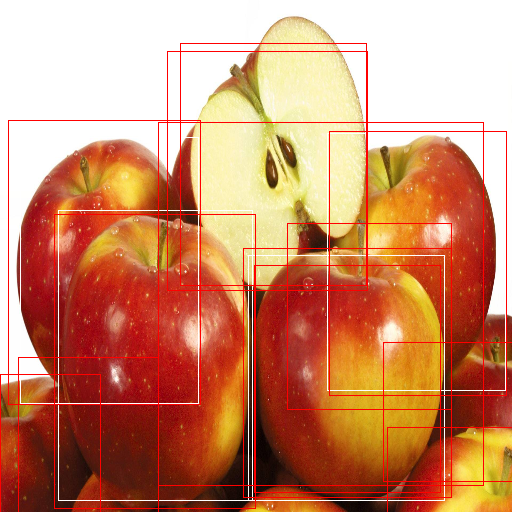

In [38]:
from PIL import ImageDraw

image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)
for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image

У меня по какой-то причине не работает iter, поэтому я просто рандомно сгенерила числа и вытащила картинки из датасета... 

In [39]:
image, labels = val_dataset[int(np.random.randint(0, len(val_dataset), 1))]
pred = model(image.unsqueeze(0).to(device))[0]

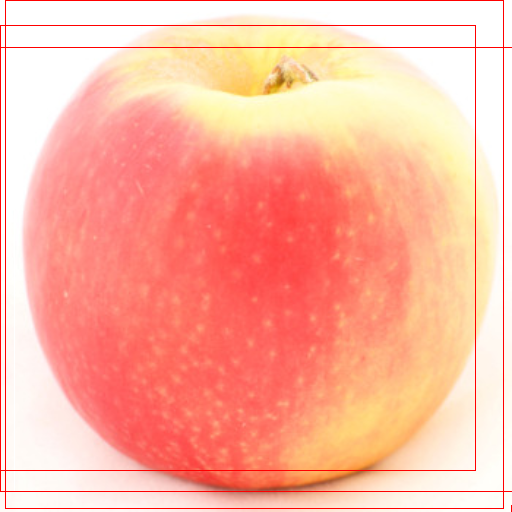

In [40]:
image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)
for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image

## Бонус (10 баллов).

__Задание__. В части с классификацией добейтесь accuracy не менее 0.52. Напишите отчёт о проделанных экспериментах.

__Критерии оценки__. Оценка за бонусную часть равна 10, если вы преодолели качество 0.52 и 0 в противном случае.

__Иных оценок кроме 0 и 10 не предусмотрено__.

In [ ]:
# YOUR CODE

## Бонус (0 баллов).

__Задание 1__. Скиньте ниже смешную картинку, желательно про машинное обучение. На картинке не должно быть никаких упоминаний лектора, семинаристов и ассистентов этого курса.

__Задание 2__. Расскажите, как вам задание? Что понравилось, что не понравилось, что можно улучшить? Мы примем во внимание любой фидбек.

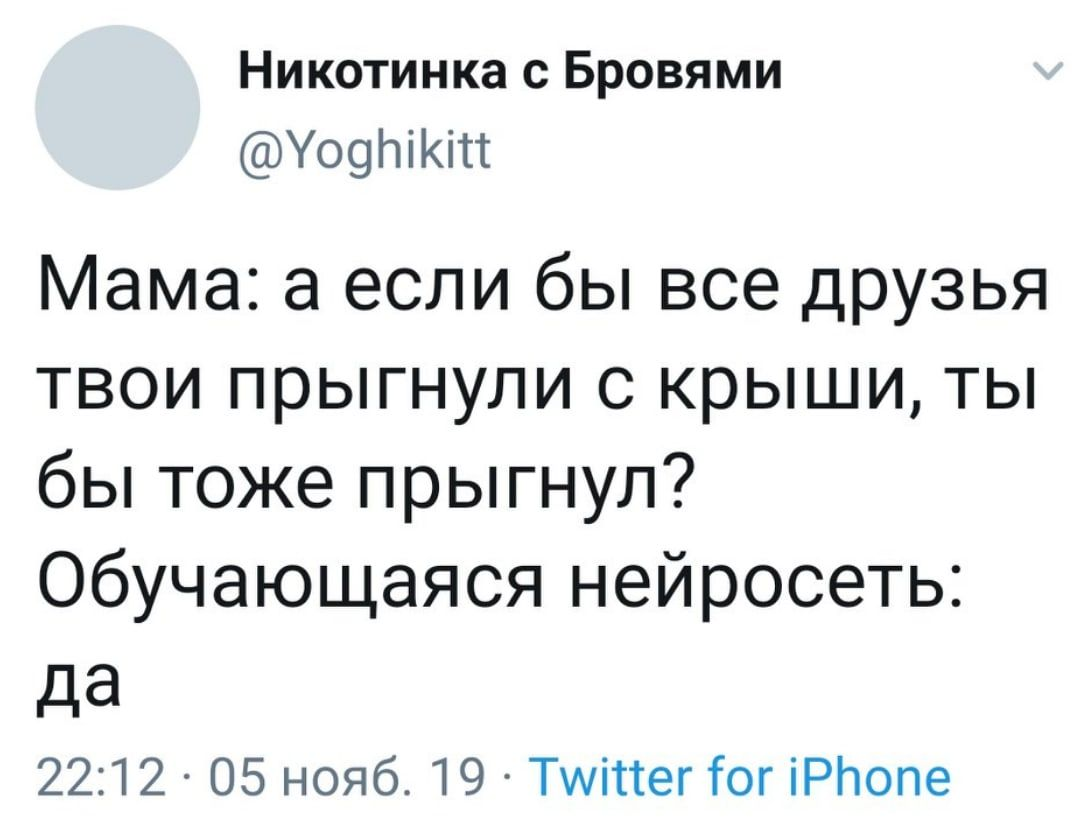 

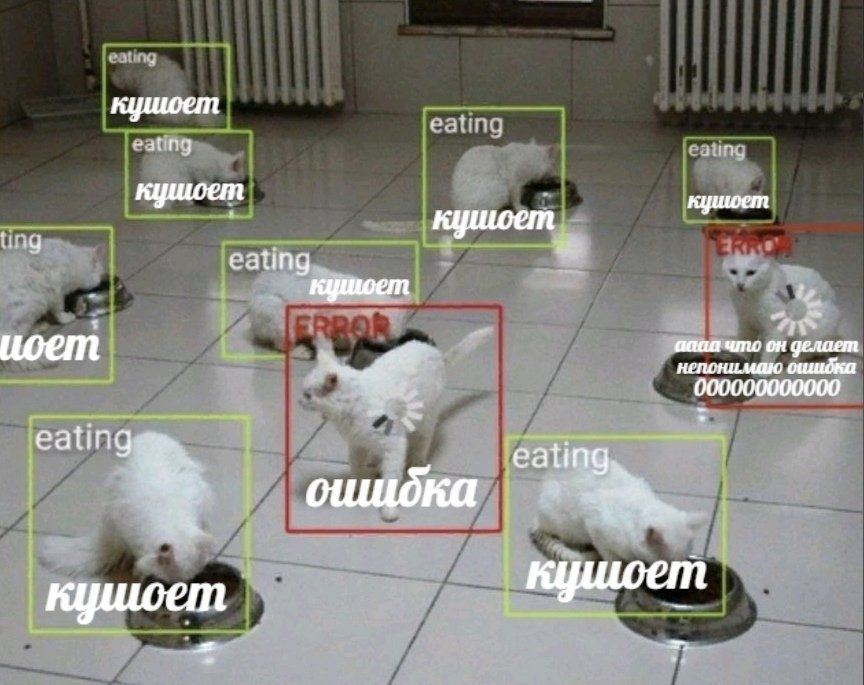

По фидбеку – очень хотелось бы иногда пояснений к коду, что конкретно должна делать функция, если частично она была написана изначально, что должны делать внутренние функции в классе, если нужно написать класс. Плюс, мне кажется очень бы зашли семинары (консы?) где мы разбираем не сам метод, а код для реализации, так как на обычных семах мы как правило пытаемся концептуально понять, что мы делаем, а не разобрать каждую строчку кода. Потом когда эти строчки когда нужно писать самому, возникают большие сложности. Н аэтих же семах/консах можно было бы обсудить траблшутинг, то есть как фиксить наиболее часто возникающие проблемы, например.   
Самое задание норм, кроме того, что два дня я реально пыталась написать класс датасет и ничего не получалось, и что гпу часто переполняется))) но i guess второе это просто реальность жизни датасаентиста, надо видеокарту купить наверное... 
